# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

0 0 0.18856954940495874
0 50 25.59202621265541
0 100 43.01776764037872
0 150 61.898780453077336
1 0 0.18921533150201889
1 50 25.56734093674667
1 100 42.96508995670851
1 150 61.82557822034535
2 0 0.19549556838007334
2 50 25.327910504808482
2 100 42.455050027092526
2 150 61.116138858091574
3 0 0.18849759182896417
3 50 25.59477760492356
3 100 43.0236401093071
3 150 61.90694018885608
4 0 0.2435490906645465
4 50 23.487102733275385
4 100 38.59930049969038
4 150 55.71840064765809
5 0 0.312434743360826
5 50 18.001381027452176
5 100 28.319353032564777
5 150 41.4549405892189
6 0 0.22517973050459889
6 50 12.92739395050374
6 100 21.9875138295601
6 150 33.515323064402544
7 0 0.025774088144396974
7 50 14.02529860199857
7 100 26.267497187476046
7 150 41.026027470020765
lambda:  100.0
without regularization: (lambda = 0)
E_train:  0.0
w^2:  1.2953525220502202
with regularization(lambda = 100.0): 
E_train:  0.0
w^2:  0.11651782142175657
without regularizatio E_test:  0.10547463586137619
with regulariza

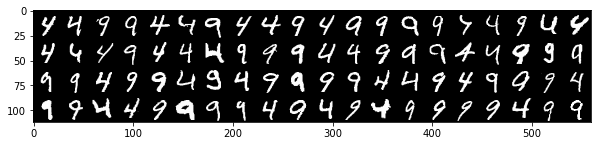

In [6]:
%%time
show_digit(X)
# Do feature normalization here
# begin answer
X = (X - np.mean(X)) / np.std(X)
x = np.vstack((np.ones((1, X.shape[1])), X))
# end answer

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')


from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1) 
        w = ridge(X_, y_, lmbdas[i])
        pred = np.dot(w.T, x[:, [j]])
        E_val = E_val + (pred[0, 0] - y[0, j]) *(pred[0, 0] - y[0, j]) 
        if j % 50 == 0:
            print(i, j, E_val)
    # Update lmbda according validation error
    # begin answer
    if E_val_min > E_val:
        lmbda = lmbdas[i]
        E_val_min = E_val
    # end answer
    
print("lambda: ", lmbda)
# Compute training error
# without regularization
w0 = ridge(X, y, 0)
prediction =  np.dot(w0.T, x)
p = prediction * y <= 0
E_train = np.sum(p) / X.shape[1]
print('without regularization: (lambda = 0)')
print('E_train: ', E_train)
print('w^2: ', np.dot(w0.T, w0)[0, 0])

# with regularization
w_r = ridge(X, y, lmbda)
prediction =  np.dot(w_r.T, x)
p = prediction * y <= 0
E_train = np.sum(p) / X.shape[1]
print('with regularization(lambda = {}): '.format(lmbda))
print('E_train: ', E_train)
print('w^2: ', np.dot(w_r.T, w_r)[0, 0])

# Do feature normalization to X_test, y_test
xtest = (X_test - np.mean(X_test)) / np.std(X_test)
xtest = np.vstack((np.ones((1, xtest.shape[1])), xtest))

# Compute test error
prediction =  np.dot(w0.T, xtest)
p = prediction * y_test <= 0
E_test = np.sum(p) / xtest.shape[1]
print('without regularizatio E_test: ', E_test)
prediction =  np.dot(w_r.T, xtest)
p = prediction * y_test <= 0
E_test = np.sum(p) / xtest.shape[1]
print('with regularizatio E_test: ', E_test)

### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [5]:
%%time
from logistic_r import logistic_r

def sigmiod(z):
    return 1 / (1 + np.exp(-z))

lmbda = 0
E_val_min = float('inf')
# y[y < 0] = 0
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1) 
        w = logistic_r(X_, y_, lmbdas[i])
        pred = sigmiod(np.dot(w.T, x[:, [j]]))
        E_val = E_val + (pred[0, 0] - max(y[0, j],0)) * (pred[0, 0] - max(y[0, j], 0))
        if j % 50 == 0:
            print(lmbdas[i], j, E_val)
    print('w^2: ', np.dot(w.T, w)[0, 0])
    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        lmbda = lmbdas[i]
        E_val_min = E_val
    # end answer
    

def getError(x, y, w):
    pred = sigmiod(np.dot(w.T, x))
    correct = 0
    for j in range(x.shape[1]):
        if pred[0, j] < 0.5 and y[0, j] < 0:
            correct += 1
        elif pred[0, j] >= 0.5 and y[0, j] > 0:
            correct += 1
    return 1 - correct / x.shape[1]
# Compute training error
print("lambda: ", lmbda)
# Compute training error
# without regularization
w0 = logistic_r(X, y, 0)
E_train = getError(x, y, w0)
print('without regularization E_train: ', E_train)
# with regularization
w_r = logistic_r(X, y, lmbda)
E_train = getError(x, y, w_r)
print('with regularization E_train: ', E_train)
# Compute test error
E_test = getError(xtest, y_test, w0)
print('without regularizatio E_test: ', E_test)
E_test = getError(xtest, y_test, w_r)
print('with regularizatio E_test: ', E_test)


0.001 0 1.3877921296814263e-10
0.001 50 2.1871025922636442
0.001 100 3.167967416410617
0.001 150 4.894821249694962
w^2:  4.377812333332525
0.01 0 1.3982308585659681e-10
0.01 50 2.1863738813690623
0.01 100 3.1668110600339325
0.01 150 4.893459359448284
w^2:  4.37642888838573
0.1 0 1.561197737450563e-10
0.1 50 2.1793592252507406
0.1 100 3.1561782062447294
0.1 150 4.882676139326014
w^2:  4.344742320760197
0.0 0 1.3849655021746948e-10
0.0 50 2.18718707440258
0.0 100 3.1680702830808616
0.0 150 4.894927757459263
w^2:  4.378577542590986
1.0 0 5.76802899049207e-10
1.0 50 2.104631821647358
1.0 100 3.0506407230900896
1.0 150 4.7771367023040225
w^2:  3.919725480035999
10.0 0 4.3019042150633423e-07
10.0 50 1.9023937605660164
10.0 100 2.9611751029063975
10.0 150 4.800256041690765
w^2:  1.6560083335168652
100.0 0 8.213057199954975e-05
100.0 50 3.2082015222602998
100.0 100 5.828536651352626
100.0 150 8.890660471600418
w^2:  0.4922199930596302
1000.0 0 0.9995493002021706
1000.0 50 30.46150391721963
100